In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt # Import matplotlib library


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


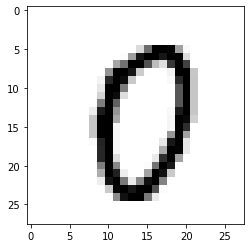

In [4]:
plt.imshow(x_train[1000], cmap=plt.cm.binary)
plt.show()

In [13]:
# normalizing the data beforehand from 255 to 1 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [5]:
import numpy as np
image_size = 28
xtrainr = np.array(x_train).reshape(-1 ,image_size,image_size, 1)
x_testr = np.array(x_test).reshape(-1 ,image_size,image_size,1)


In [16]:
model = tf.keras.models.Sequential()
# Add the Convolution Layer
model.add(tf.keras.layers.Conv2D(16, (3,3),activation= 'relu',  input_shape = xtrainr.shape[1:]))
#For reducing Feature Size , Activation layers for non linearity  (Relu: negative Inputs are ignored)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3),activation= 'relu',  input_shape = xtrainr.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3),activation= 'relu',  input_shape = xtrainr.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [19]:
model.fit(xtrainr, y_train, epochs=5 , validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.4572 - accuracy: 0.8820 - val_loss: 0.1373 - val_accuracy: 0.9596
Epoch 2/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1268 - accuracy: 0.9633 - val_loss: 0.1179 - val_accuracy: 0.9663
Epoch 3/5
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0953 - accuracy: 0.9722 - val_loss: 0.0829 - val_accuracy: 0.9751
Epoch 4/5
1313/1313 [==============================] - 16s 13ms/step - loss: 0.0757 - accuracy: 0.9773 - val_loss: 0.1073 - val_accuracy: 0.9696
Epoch 5/5
1313/1313 [==============================] - 15s 12ms/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.0728 - val_accuracy: 0.9785
